0.776606919
0.0
1.960322503
0.433693028
3.549554587
0.592953266
Index([('AT1G01010',), ('AT1G01020',), ('AT1G01030',), ('AT1G01040',),
       ('AT1G01050',), ('AT1G01060',), ('AT1G01070',), ('AT1G01080',),
       ('AT1G01090',), ('AT1G01100',),
       ...
       ('ATMG01200',), ('ATMG01220',), ('ATMG01330',), ('ATMG01350',),
       ('ATMG01360',), ('ATMG01370',), ('ATMG01380',), ('ATMG01390',),
       ('ATMG01400',), ('ATMG01410',)],
      dtype='object', length=22010)
[[-0.36787314 -0.63004093  0.40687522 ..., -0.68142688  0.         -0.4472136 ]
 [-1.01387434 -0.01973507  1.74944365 ...,  1.13789195  0.         -0.4472136 ]
 [ 0.61677131  0.49781768 -0.90553477 ..., -0.19267017  0.          2.23606798]
 [-0.65311755  1.93044497  0.56028545 ..., -0.83640221  0.         -0.4472136 ]
 [ 1.9387346  -0.73641768 -0.90553477 ..., -1.0060255   0.         -0.4472136 ]
 [-0.52064088 -1.04206897 -0.90553477 ...,  1.57863281  0.         -0.4472136 ]]
(6, 22010)


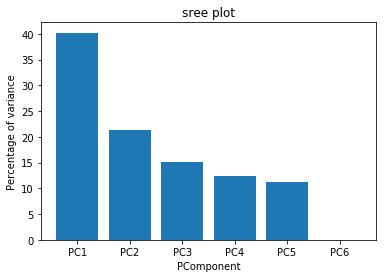

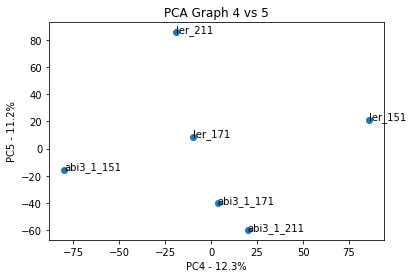

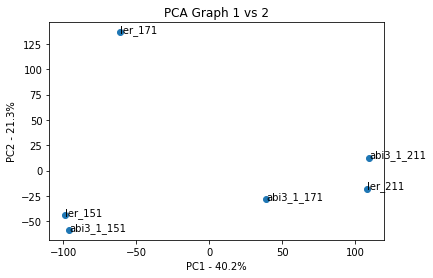

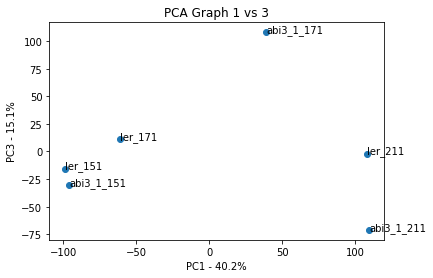

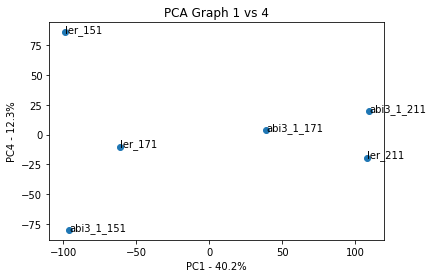

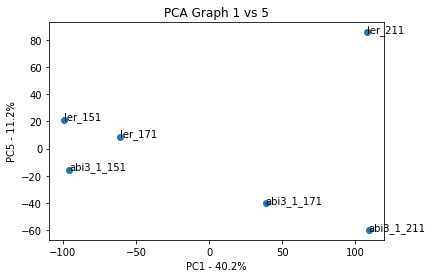

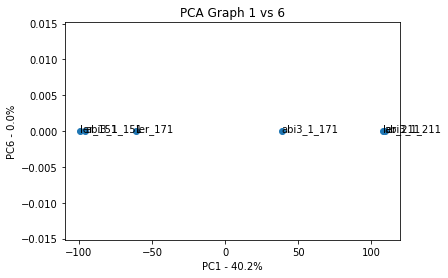

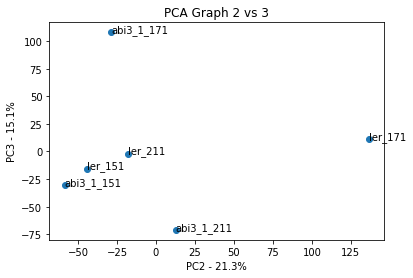

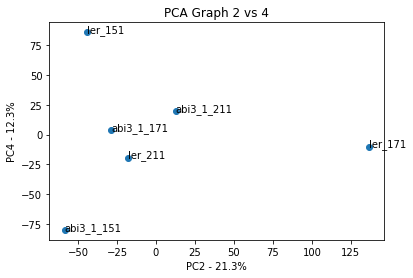

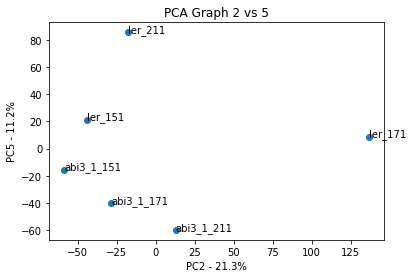

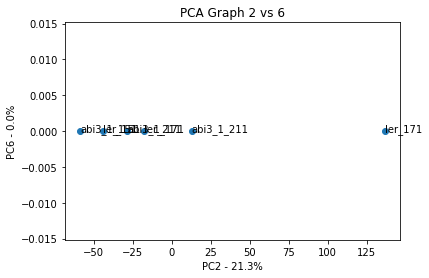

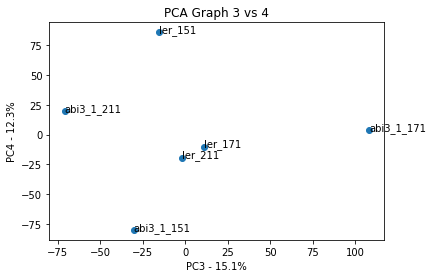

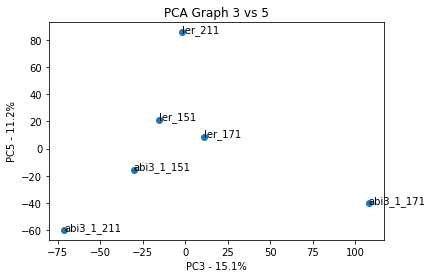

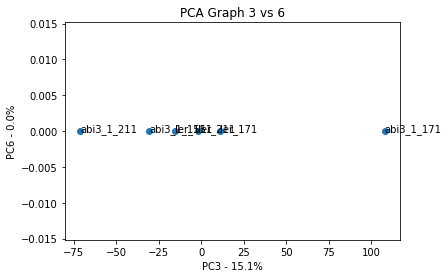

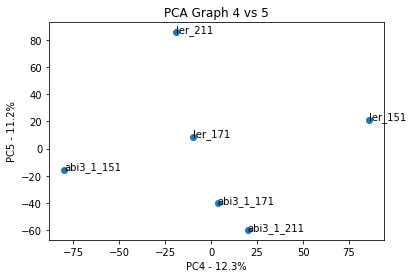

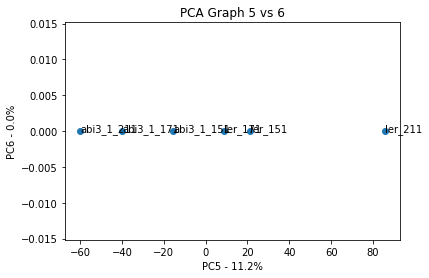

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df1=pd.read_csv('data_ler_abi3_1.csv')
genes=df1.loc["0":,"genes":"genes"]
ler_15=['ler_15' + str(i) for i in range(1,2)]
ler_17=['ler_17' + str(i) for i in range(1,2)]
ler_21=['ler_21' + str(i) for i in range(1,2)]
abi3_1_15=['abi3_1_15' + str(i) for i in range(1,2)]
abi3_1_17=['abi3_1_17' + str(i) for i in range(1,2)]
abi3_1_21=['abi3_1_21' + str(i) for i in range(1,2)]

data=pd.DataFrame(columns=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21],index=genes)
i=0
print(df1.iloc[i]['ler_15'])
print(df1.iloc[i]['ler_17'])
print(df1.iloc[i]['ler_21'])
print(df1.iloc[i]['abi3_1_15'])
print(df1.iloc[i]['abi3_1_17'])
print(df1.iloc[i]['abi3_1_21'])


print(data.index)
for gene in data.index:
    data.loc[gene,'ler_151':'ler_151']=df1.iloc[i]['ler_15']
    data.loc[gene,'ler_171':'ler_171']=df1.iloc[i]['ler_17']
    data.loc[gene,'ler_211':'ler_211']=df1.iloc[i]['ler_21']
    data.loc[gene,'abi3_1_151':'abi3_1_151']=df1.iloc[i]['abi3_1_15']
    data.loc[gene,'abi3_1_171':'abi3_1_171']=df1.iloc[i]['abi3_1_17']
    data.loc[gene,'abi3_1_211':'abi3_1_211']=df1.iloc[i]['abi3_1_21']
   
    i=i+1

scaled_data=StandardScaler().fit_transform(data.T)
print(scaled_data)
print(scaled_data.shape)

check_data=np.transpose(scaled_data)


scaled_data.to_csv('scaled data.csv', sep='\t', encoding='utf-8')
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
figure=plt.figure()
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of variance')
plt.xlabel('PComponent')
plt.title('sree plot')
plt.show()
figure.savefig('sreeplot10.png')



figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21 ], columns=labels)
plt.scatter(pca_df.PC4,pca_df.PC5)
plt.title('PCA Graph 4 vs 5')
plt.xlabel('PC4 - {0}%'.format(per_var[3]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC4.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('PC4_PC5.png')

pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA Graph 1 vs 2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()
figure.savefig('1.png')


figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC3)
plt.title('PCA Graph 1 vs 3')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC3.loc[sample]))
plt.show()
figure.savefig('2.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC4)
plt.title('PCA Graph 1 vs 4')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('PC1_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC5)
plt.title('PCA Graph 1 vs 5')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('PC1_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21 ], columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC6)
plt.title('PCA Graph 1 vs 6')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('PC1_PC6.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC3)
plt.title('PCA Graph 2 vs 3')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC3.loc[sample]))
plt.show()
figure.savefig('PC2_PC3.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC4)
plt.title('PCA Graph 2 vs 4')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('PC2_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC5)
plt.title('PCA Graph 2 vs 5')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('PC2_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21 ], columns=labels)
plt.scatter(pca_df.PC2,pca_df.PC6)
plt.title('PCA Graph 2 vs 6')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC2.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('PC2_PC6.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC3,pca_df.PC4)
plt.title('PCA Graph 3 vs 4')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC3.loc[sample],pca_df.PC4.loc[sample]))
plt.show()
figure.savefig('PC3_PC4.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC3,pca_df.PC5)
plt.title('PCA Graph 3 vs 5')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC3.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('PC3_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC3,pca_df.PC6)
plt.title('PCA Graph 3 vs 6')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC3.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('PC3_PC6.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC4,pca_df.PC5)
plt.title('PCA Graph 4 vs 5')
plt.xlabel('PC4 - {0}%'.format(per_var[3]))
plt.ylabel('PC5 - {0}%'.format(per_var[4]))

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC4.loc[sample],pca_df.PC5.loc[sample]))
plt.show()
figure.savefig('PC4_PC5.png')

figure=plt.figure()
pca_df=pd.DataFrame(pca_data,index=[*ler_15, *ler_17 , *ler_21, *abi3_1_15, *abi3_1_17, *abi3_1_21], columns=labels)
plt.scatter(pca_df.PC5,pca_df.PC6)
plt.title('PCA Graph 5 vs 6')
plt.xlabel('PC5 - {0}%'.format(per_var[4]))
plt.ylabel('PC6 - {0}%'.format(per_var[5]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC5.loc[sample],pca_df.PC6.loc[sample]))
plt.show()
figure.savefig('PC5_PC6.png')


loading_scores0=pd.Series(pca.components_[0],index=genes)
loading_scores0.to_csv('loading_scores_alongPC1.csv', sep='\t', encoding='utf-8')


loading_scores1=pd.Series(pca.components_[1],index=genes)
loading_scores1.to_csv('loading_scores_alongPC2.csv', sep='\t', encoding='utf-8')

loading_scores2=pd.Series(pca.components_[2],index=genes)
loading_scores2.to_csv('loading_scores_alongPC3.csv', sep='\t', encoding='utf-8')
        
loading_scores3=pd.Series(pca.components_[3],index=genes)
loading_scores3.to_csv('loading_scores_alongPC4.csv', sep='\t', encoding='utf-8')       
        
        